# PROJECT PHASE 3

### Overview

The goal of this project is to predict whether people got H1N1 vaccine using information they shared about their backgrounds, opinions, and health behaviors?

In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

# 1.Business Understanding

Vaccine manufacturers might be interested in understanding the factors that influence vaccine uptake among the general population. This information can aid them in marketing strategies and production planning.

Recently a newly established Pharmaceutical Company called Jogoo Pharma delved into the vaccine making business. They are interested in understanding the factors that cause the vaccine uptake among the general population so that it can aid them in marketing strategies and control their production volume on the outcome of this specific project.

The datasource available to us is the National 2009 H1N1 Flu Survey (NHFS).

This project should help the company and its stakeholders in its endeavours and also comes amid the trail left by COVID-19 recently which shook the world.

This project should provide understanding to the potential upcoming of new respiratory diseases like COVID or H1N1.

# 2.Data Understanding

##### Data Sources and the dataset
The Dataset available to us is the H1N1 and Seasonal Flu Dataset collected by the United States 
The dataset avalable to us comes in three parts, that is:
* **training_set_features.csv**: This contains the multiclass predictors of the training data we will be working with here in this notebook.
* **training_set_labels.csv**: This contains two  targets we will be working with that is the seasonal vaccine and the h1n1 vaccine but we will be choosing the h1n1 vaccine label only.

* **test_set_features.csv** : This contains test data we will be feeding into our final model after we successfully come up with one .

##### Lets load the Dataset to understand it further 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/training_set_features.csv',index_col='respondent_id')

In [3]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
df.shape

(26707, 35)

>The dataset contains 26707 observations and 35 different columns

In [5]:
# data types we will be working with
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

> **majority of the predictors available to us are of data type float and remaining others are objects**

In [6]:
# Basic Knowledge
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

The dataset has 26707 entries ranging from 0 to 26706 and 35 data columns. The dataset shows to be having many null values .Of the 35 columns 23 columns are of float64 data type and the remaining 12 columns are of object

In [7]:
# summary statistics 
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


Based on the summary statistics some of the predictors are binary values ranging from one to zero while others range 0 to 5 , 1 to 5 and 0 to 3. This information is crucial to us if we need to use distance based algorithms such as K-Nearest Neighbours(KNN).

The mean of each columns is situated around 0 to 2 and the standard deviation around 0 TO 1 

#### Lets see the distribution of the data

In [8]:
floats = df.select_dtypes('float64')
floats.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [9]:
objects = df.select_dtypes('object')
objects.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

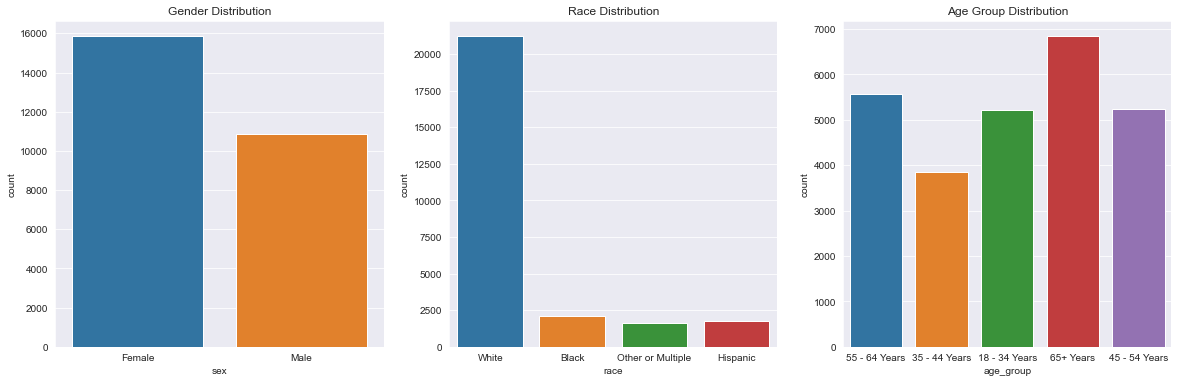

In [10]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.countplot(objects.sex,ax = axes[0])
axes[0].set_title('Gender Distribution')

# To plot on the second subplot:
sns.countplot(objects.race,ax = axes[1])
axes[1].set_title('Race Distribution')

# To plot on the third subplot:
sns.countplot(objects.age_group,ax = axes[2])
axes[2].set_title('Age Group Distribution')

plt.show()

* The Majority of the gender observations recorded are females .

* The Majority of the race column says that the abundant race is white .

* The Majority of the age group recorded in the dataset is 65+ years.


In [11]:
print(objects.employment_industry.value_counts(normalize=True))
print(objects.employment_occupation.value_counts(normalize=True))
print(objects.hhs_geo_region.value_counts(normalize=True))

fcxhlnwr    0.184496
wxleyezf    0.134858
ldnlellj    0.092024
pxcmvdjn    0.077521
atmlpfrs    0.069223
arjwrbjb    0.065112
xicduogh    0.063617
mfikgejo    0.045900
vjjrobsf    0.039396
rucpziij    0.039097
xqicxuve    0.038200
saaquncn    0.025267
cfqqtusy    0.024295
nduyfdeo    0.021380
mcubkhph    0.020558
wlfvacwt    0.016072
dotnnunm    0.015026
haxffmxo    0.011064
msuufmds    0.009270
phxvnwax    0.006653
qnlwzans    0.000972
Name: employment_industry, dtype: float64
xtkaffoo    0.134320
mxkfnird    0.113999
emcorrxb    0.095943
cmhcxjea    0.094206
xgwztkwe    0.081741
hfxkjkmi    0.057868
qxajmpny    0.041399
xqwwgdyp    0.036640
kldqjyjy    0.035431
uqqtjvyb    0.034147
tfqavkke    0.029312
ukymxvdu    0.028103
vlluhbov    0.026743
oijqvulv    0.025988
ccgxvspp    0.025761
bxpfxfdn    0.025006
haliazsg    0.022362
rcertsgn    0.020851
xzmlyyjv    0.018735
dlvbwzss    0.017149
hodpvpew    0.015714
dcjcmpih    0.011181
pvmttkik    0.007403
Name: employment_occupation, dtype

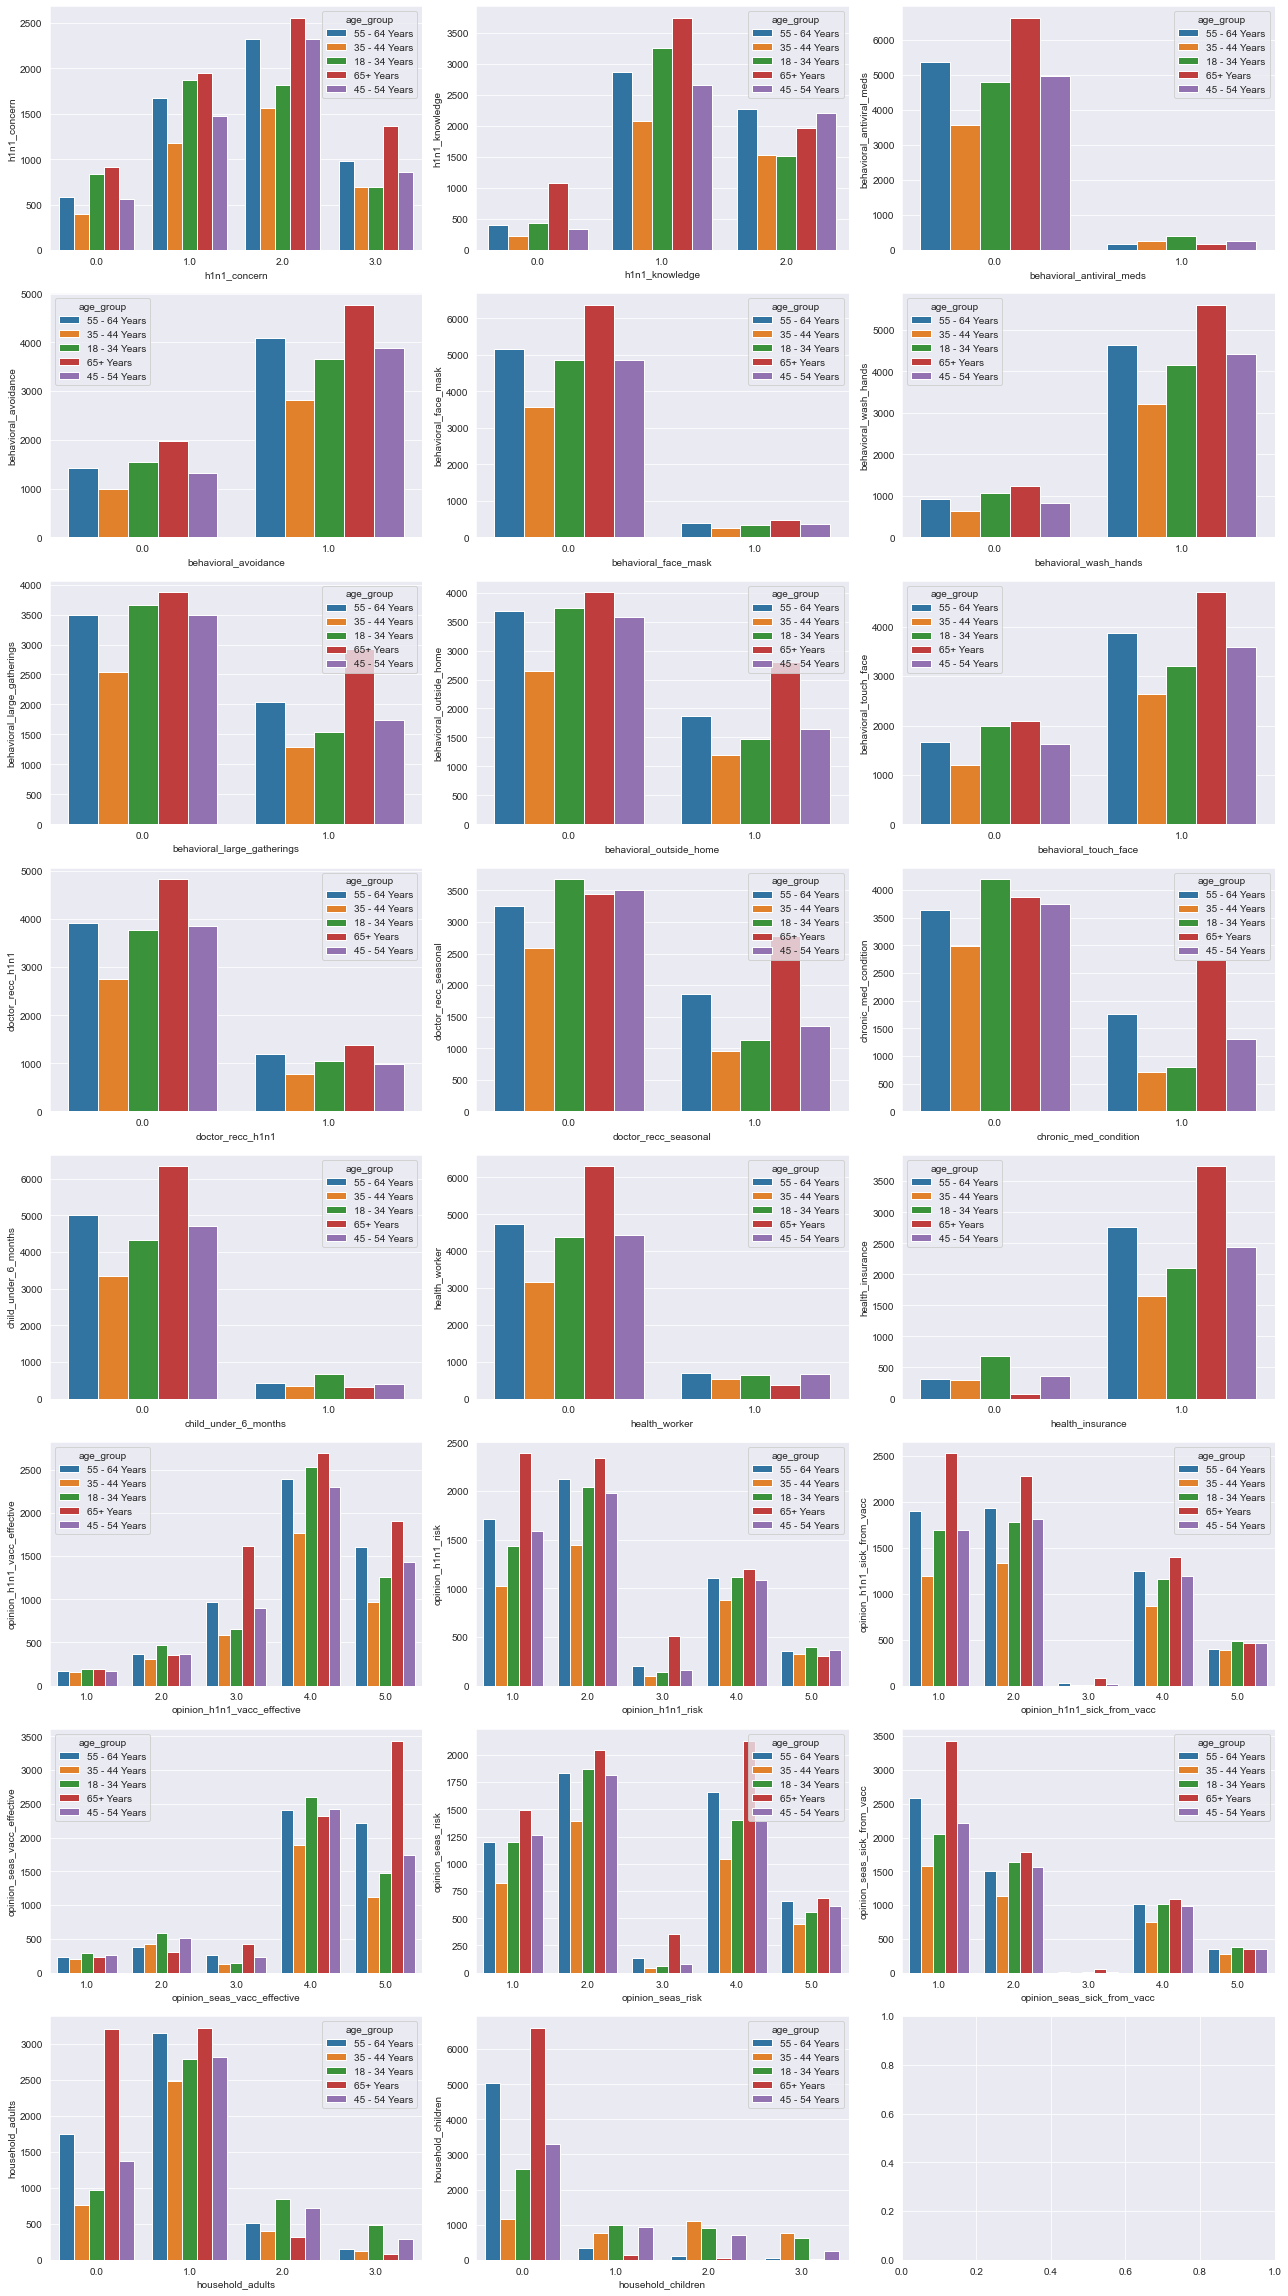

In [12]:
num_cols = len(floats.columns)
num_subplots_per_row = 3
num_rows = int(np.ceil(num_cols / num_subplots_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_subplots_per_row, figsize=(18, num_rows * 4))

for idx, col in enumerate(floats.columns):
    row_idx = idx // num_subplots_per_row
    col_idx = idx % num_subplots_per_row
    ax = axes[row_idx, col_idx]
    sns.countplot(floats[col], hue=df['age_group'],ax=ax)
    ax.set_ylabel(col) 
    
plt.tight_layout()
plt.show()


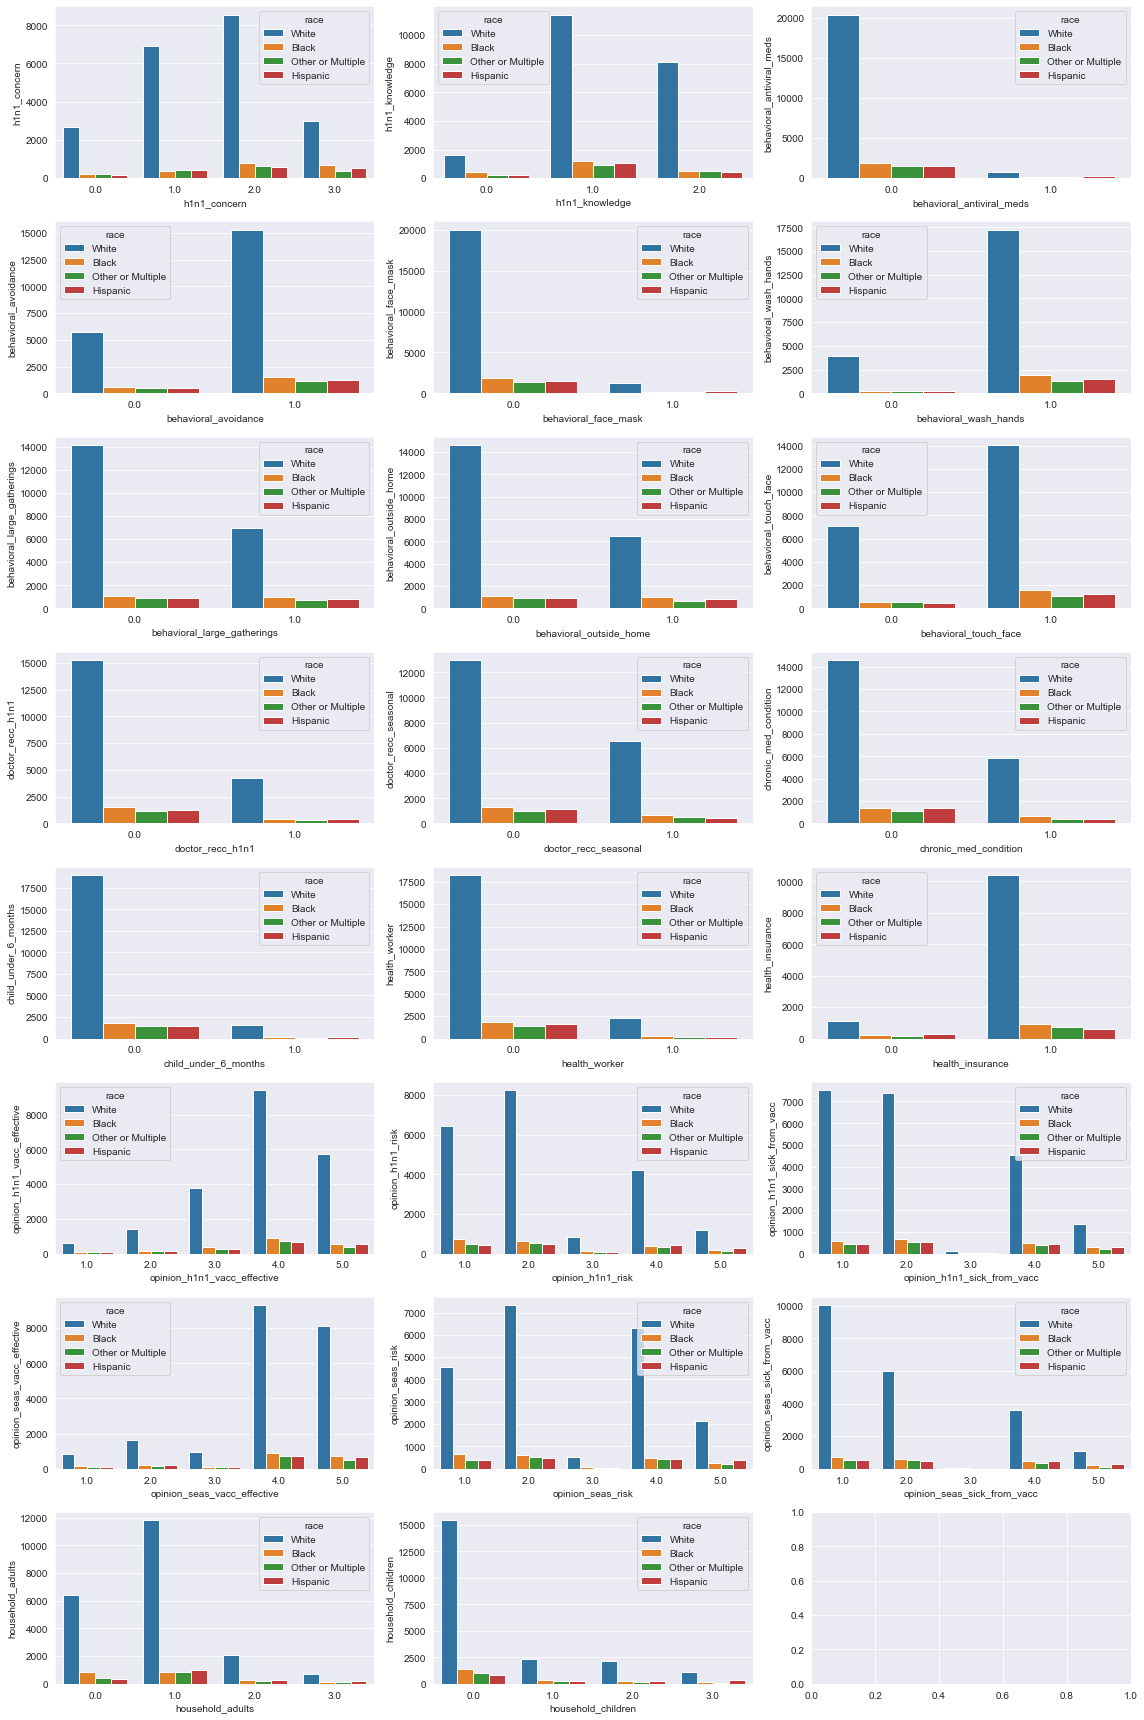

In [13]:
num_cols = len(floats.columns)
num_subplots_per_row = 3
num_rows = int(np.ceil(num_cols / num_subplots_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_subplots_per_row, figsize=(16, num_rows * 3))

for idx, col in enumerate(floats.columns):
    row_idx = idx // num_subplots_per_row
    col_idx = idx % num_subplots_per_row
    ax = axes[row_idx, col_idx]
    sns.countplot(floats[col],hue=df['race'] ,ax=ax)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


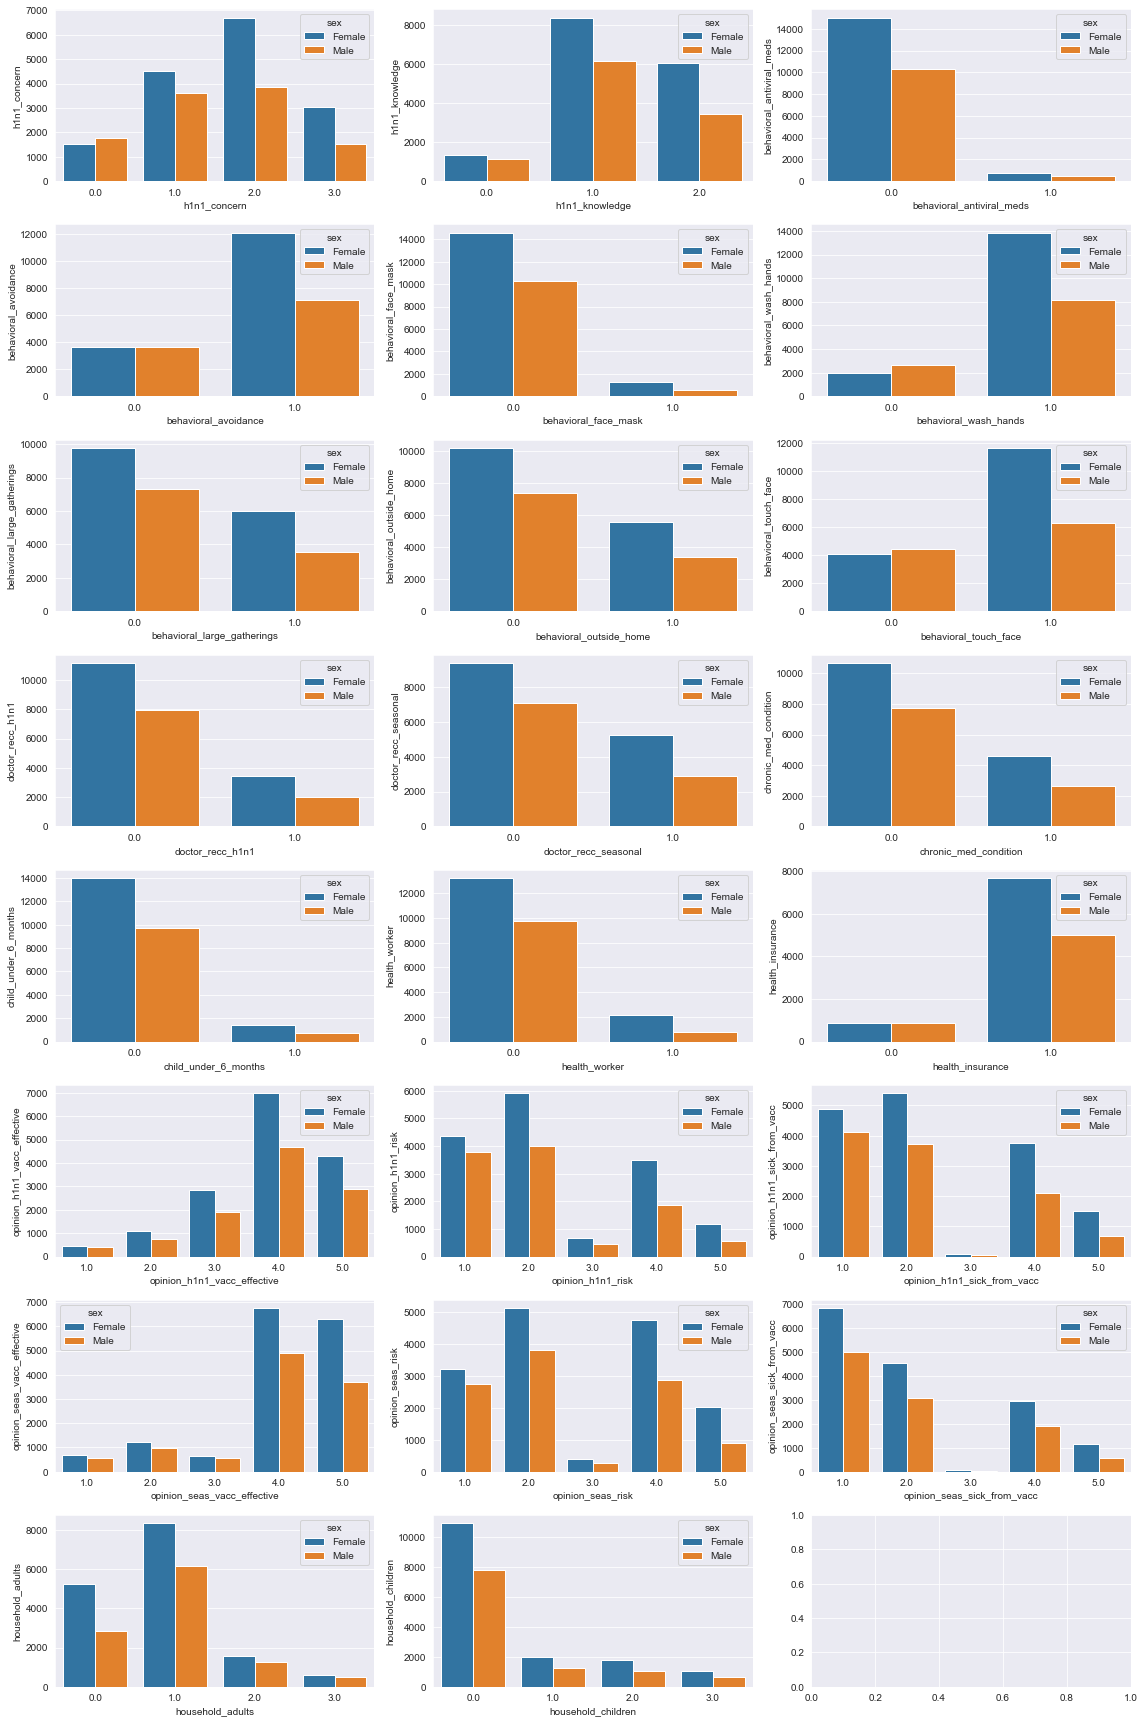

In [14]:
num_cols = len(floats.columns)
num_subplots_per_row = 3
num_rows = int(np.ceil(num_cols / num_subplots_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_subplots_per_row, figsize=(16, num_rows * 3))

for idx, col in enumerate(floats.columns):
    row_idx = idx // num_subplots_per_row
    col_idx = idx % num_subplots_per_row
    ax = axes[row_idx, col_idx]
    sns.countplot(floats[col],hue=df['sex'] ,ax=ax)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


>














The number of observations recorded in the dataset was 26707 with few null datapoints hence we have enough data to build a model

                                                                                         







.

In [15]:
# lets Load the target data
target = pd.read_csv('data/training_set_labels.csv',index_col='respondent_id')
target.isna().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

# 3.Data Preparation

## I.Dealing with missing and null values

In [16]:
df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

**Lets fill the the null and missing values using sklearn's SimpleImputer**








.

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  

# Lets fit the dataset

imputer.fit(df)


SimpleImputer(strategy='most_frequent')

In [18]:
df_imputed = imputer.transform(df)

In [19]:
df_imputed

array([[1.0, 0.0, 0.0, ..., 0.0, 'fcxhlnwr', 'xtkaffoo'],
       [3.0, 2.0, 0.0, ..., 0.0, 'pxcmvdjn', 'xgwztkwe'],
       [1.0, 1.0, 0.0, ..., 0.0, 'rucpziij', 'xtkaffoo'],
       ...,
       [2.0, 2.0, 0.0, ..., 0.0, 'fcxhlnwr', 'xtkaffoo'],
       [1.0, 1.0, 0.0, ..., 0.0, 'fcxhlnwr', 'haliazsg'],
       [0.0, 0.0, 0.0, ..., 0.0, 'fcxhlnwr', 'xtkaffoo']], dtype=object)

**Changing the numpy array back to a pandas DataFrame**

In [20]:
df_new = pd.DataFrame(data=df_imputed,columns=df.columns)

In [21]:
df_new.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,...,26707,26707,26707,26707,26707,26707,26707.0,26707.0,26707,26707
unique,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3,2,2,3,10,3,4.0,4.0,21,23
top,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo
freq,10667.0,14714.0,25406.0,19436.0,24866.0,22057.0,17160.0,17726.0,18129.0,21299.0,...,17200,14963,20778,15023,4297,11645,14723.0,18921.0,15798,15248


In [22]:
df_new.dtypes

h1n1_concern                   object
h1n1_knowledge                 object
behavioral_antiviral_meds      object
behavioral_avoidance           object
behavioral_face_mask           object
behavioral_wash_hands          object
behavioral_large_gatherings    object
behavioral_outside_home        object
behavioral_touch_face          object
doctor_recc_h1n1               object
doctor_recc_seasonal           object
chronic_med_condition          object
child_under_6_months           object
health_worker                  object
health_insurance               object
opinion_h1n1_vacc_effective    object
opinion_h1n1_risk              object
opinion_h1n1_sick_from_vacc    object
opinion_seas_vacc_effective    object
opinion_seas_risk              object
opinion_seas_sick_from_vacc    object
age_group                      object
education                      object
race                           object
sex                            object
income_poverty                 object
marital_stat

looks like the data types were all converted to objects after the imputer was used. Lets turn them back to their original data types









.

In [23]:
columns_to_float = floats.columns
for col in columns_to_float:
    if col in df_new.columns:
        df_new[col] = df_new[col].astype('float')
df_new.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

## II. Checking and removing Multicollinearity

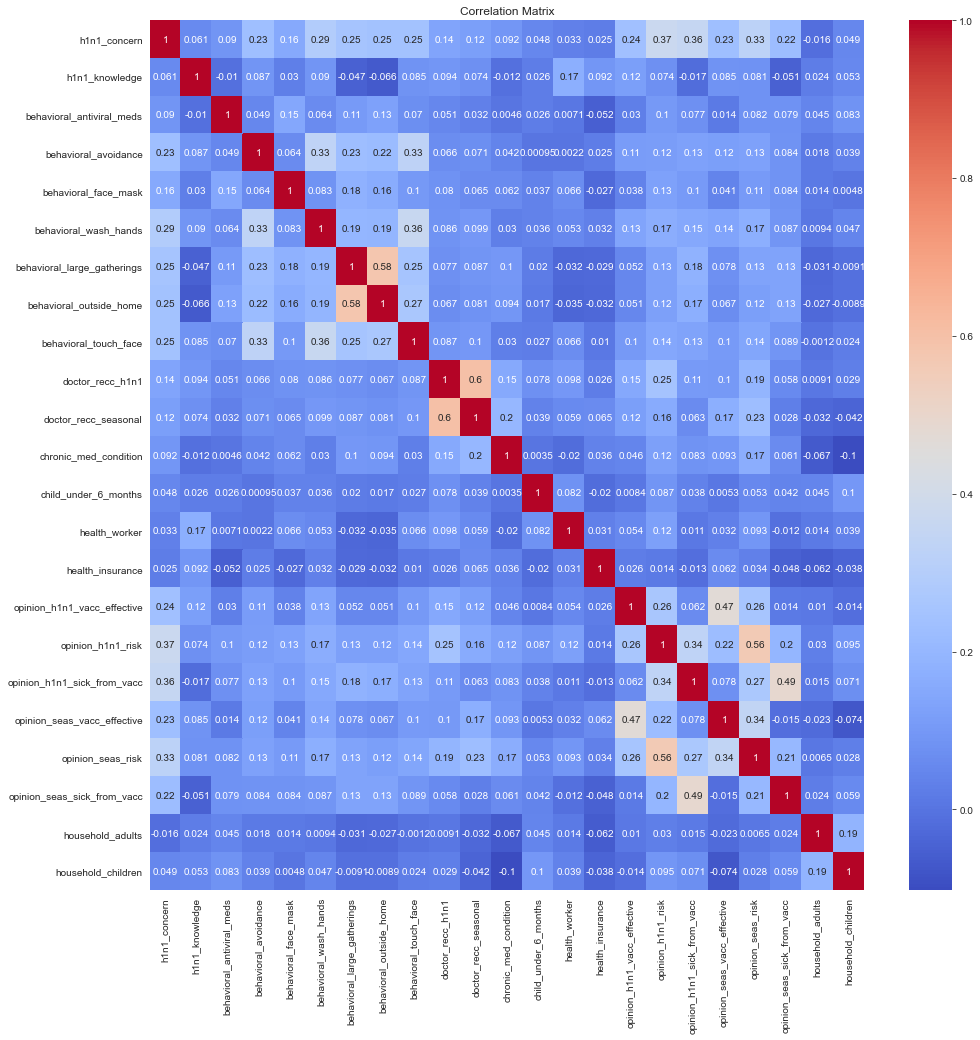

In [24]:
correlation_matrix = (df_new.select_dtypes('float64')).corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

NO large correlations above 0.7 observed

## III. Converting categorical data to numeric format through one-hot encoding

In [25]:
ohe_columns = df_new.select_dtypes('object').columns
ohe_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [26]:
df_encoded = pd.get_dummies(data=df_new,columns=[x for x in ohe_columns],drop_first=True)

In [27]:
df_encoded.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_encoded.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 93, dtype: int64

## IV. Splitting the data.

In [29]:
# Let's split the data before feeding it to the model
from sklearn.model_selection import train_test_split

In [30]:
y = target.drop('seasonal_vaccine',axis=1)

In [31]:
X = df_encoded

In [32]:
SEED = 42

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = SEED)

In [34]:
print(f'Training Data: \nX_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}\n\n')
print(f'Testing Data: \nX_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')
print('')

Training Data: 
X_train Shape: (20030, 93)
y_train Shape: (20030, 1)


Testing Data: 
X_test Shape: (6677, 93)
y_test Shape: (6677, 1)



# 4.Modelling 

### I.Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , \
                            precision_score ,recall_score , \
                            accuracy_score , f1_score

In [36]:
logreg = LogisticRegression()

model = logreg.fit(X_train,y_train)

preds1 = model.predict(X_test)
preds_train1 = model.predict(X_train)

print('Accuracy Score on the train data',accuracy_score(y_train,preds_train1))
print('Accuracy Score on the test data',accuracy_score(y_test,preds1))
print('')

print('Recall Score on the train Data ', recall_score(y_train,preds_train1))
print('Recall Score on the test Data ', recall_score(y_test,preds1))
np.unique(preds1)

Accuracy Score on the train data 0.8367948077883175
Accuracy Score on the test data 0.8395986221356897

Recall Score on the train Data  0.4287056612638008
Recall Score on the test Data  0.42766407904022585


array([0, 1], dtype=int64)

In [37]:
conf_matrix = confusion_matrix(y_test,preds1)

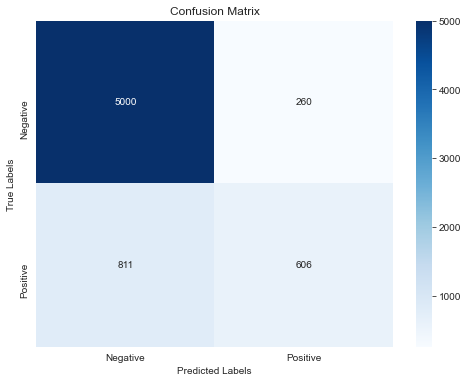

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Now that we have our baseline model and we are trying to identify the correct number of positive cases recorded.Let's try to improve our Logistic model to have a better recall score.




.

In [39]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [40]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

model2 = logreg.fit(X_train_scaled,y_train)

preds_train2 = model2.predict(X_train_scaled)
preds_test2 = model2.predict(X_test_scaled)

print('Accuracy Score on the train data',accuracy_score(y_train,preds_train2))
print('Accuracy Score on the test data',accuracy_score(y_test,preds_test2))
print('')

print('Recall Score on the train Data ', recall_score(y_train,preds_train2))
print('Recall Score on the test Data ', recall_score(y_test,preds_test2))

Accuracy Score on the train data 0.837044433349975
Accuracy Score on the test data 0.8397483899955069

Recall Score on the train Data  0.4280009396288466
Recall Score on the test Data  0.4262526464361327


The recall score remains the same with slight changes even after we have scaled the data, this could be a result of class imbalance in our target variable. Let's check for imbalance in our target variable.











.

In [41]:
y.value_counts(normalize = True)

h1n1_vaccine
0               0.787546
1               0.212454
dtype: float64

True positive instances of the minority class are often missed, leading to a low recall score. Let's try to use SMOTE object from sklearn to address the issue of imbalance in our target variable.




.

In [42]:
smote = SMOTE(sampling_strategy='auto',random_state=SEED)

X_resampled , y_resampled = smote.fit_resample(X_train_scaled,y_train)

logreg = LogisticRegression(C = 1e16)

model3 = logreg.fit(X_resampled , y_resampled) 

preds_train3 = model3.predict(X_resampled)
preds_test3 = model3.predict(X_test_scaled)

print('Accuracy Score on the train data',accuracy_score(y_resampled,preds_train3))
print('Accuracy Score on the test data',accuracy_score(y_test,preds_test3))
print('')

print('Recall Score on the train Data ', recall_score(y_resampled,preds_train3))
print('Recall Score on the test Data ', recall_score(y_test,preds_test3))

print(" ")
print(classification_report(y_test,preds_test3))

Accuracy Score on the train data 0.7768021302225322
Accuracy Score on the test data 0.776845888872248

Recall Score on the train Data  0.7623787484942623
Recall Score on the test Data  0.7198306280875089
 
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      5260
           1       0.48      0.72      0.58      1417

    accuracy                           0.78      6677
   macro avg       0.70      0.76      0.71      6677
weighted avg       0.82      0.78      0.79      6677



The recall score significantly improved after we addressed the issue of the class imbalance. Lets try to plot a confusion matrix to see how much of true positives and negatives our model captured.













.

In [43]:
confusion_matrix_to_plot = confusion_matrix(y_test, preds_test3)

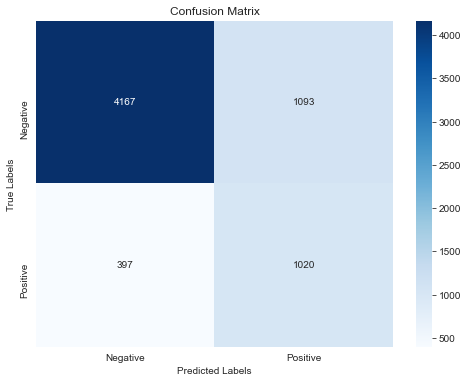

In [44]:
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix_to_plot, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.metrics import roc_curve , roc_auc_score

In [46]:
# Baseline Model
fpr1 , tpr1 , thresholds1 = roc_curve(y_test, preds1)
roc_auc1 = roc_auc_score(y_test,preds1)

# Model 2
fpr2 , tpr2 , thresholds2 = roc_curve(y_test, preds_test2)
roc_auc2 = roc_auc_score(y_test,preds_test2)

# Model 3
fpr3 , tpr3 , thresholds3 = roc_curve(y_test, preds_test3)
roc_auc3 = roc_auc_score(y_test,preds_test3)

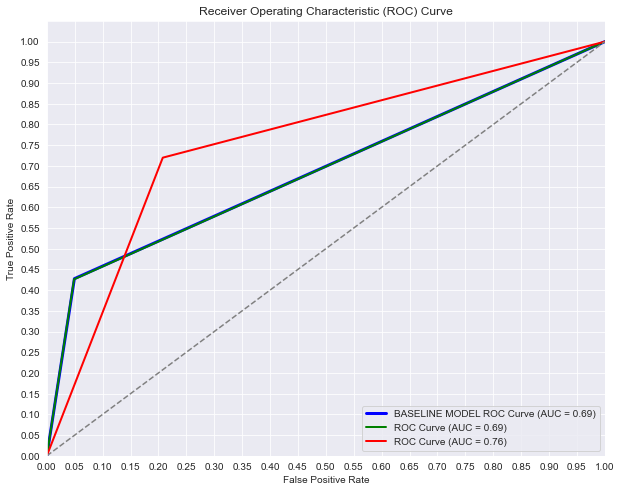

In [91]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, color='blue', lw=3, label=f'BASELINE MODEL ROC Curve (AUC = {roc_auc1:.2f})')

plt.plot(fpr2, tpr2, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc2:.2f})')

plt.plot(fpr3, tpr3, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc3:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC_CURVE_LOGISTIC.png')
plt.show()

### II. Desicion Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [49]:
dtc = DecisionTreeClassifier()

dtc.fit(X_resampled,y_resampled)

predictions = dtc.predict(X_test_scaled)
print("Test Data ", accuracy_score(y_test, predictions))

train_predictions = dtc.predict(X_resampled)
print("Train Data ", accuracy_score(y_resampled,train_predictions))

Test Data  0.7504867455444062
Train Data  1.0


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5260
           1       0.42      0.47      0.44      1417

    accuracy                           0.75      6677
   macro avg       0.64      0.65      0.64      6677
weighted avg       0.76      0.75      0.76      6677



let's apply grid search to find the best hyperparameters for our Decision trees to get a better score on the unseen data(Test Data)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = {"criterion":['gini','entropy'],
              'max_depth':[None,2,5,7,8],
              'min_samples_split':[2,3,6],
              'min_samples_leaf':[2,3],
              'max_features':[3,9,16]
             }

In [53]:
dtc_for_grid = DecisionTreeClassifier()

In [54]:
grid_search = GridSearchCV(dtc_for_grid,parameters,cv=3,return_train_score=True)

In [55]:
model = grid_search.fit(X_resampled,y_resampled)

In [56]:
model.best_score_

0.8199819267167765

In [57]:
# Mean training score
gridsearch_training_score = model.cv_results_['mean_train_score'].mean()

# Mean test score
gridsearch_testing_score = model.score(X_test_scaled,y_test)

print(f"Mean Training Score: {gridsearch_training_score  :.2%}")
print(f"Mean Test Score: {gridsearch_testing_score :.2%}")
print(f"Best Parameter Combination Found During Grid Search:{model.best_params_}")


Mean Training Score: 77.17%
Mean Test Score: 78.18%
Best Parameter Combination Found During Grid Search:{'criterion': 'entropy', 'max_depth': None, 'max_features': 16, 'min_samples_leaf': 2, 'min_samples_split': 3}


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5260
           1       0.45      0.38      0.41      1417

    accuracy                           0.77      6677
   macro avg       0.65      0.63      0.63      6677
weighted avg       0.76      0.77      0.76      6677



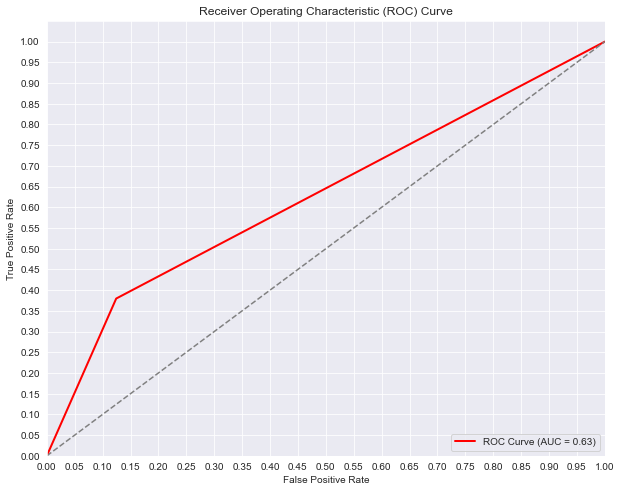

In [92]:
dtc = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=None, 
                             max_features= 16, 
                             min_samples_leaf= 2, 
                             min_samples_split= 3)

dtc.fit(X_resampled,y_resampled)

preds = dtc.predict(X_test_scaled)

print(classification_report(y_test,preds))

print('='*64)

fpr , tpr , thresholds = roc_curve(y_test,preds)
roc_auc = roc_auc_score(y_test,preds)

# plotting the Roc Curve
plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve_dtc.png')
plt.show()

### III.RandomForests

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [60]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)
preds = rf.predict(X_test_scaled)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.68      0.43      0.53      1417

    accuracy                           0.84      6677
   macro avg       0.77      0.69      0.71      6677
weighted avg       0.82      0.84      0.82      6677



In [61]:
parameters_for_rf = {'n_estimators':[10, 30, 100],
                    "criterion":['gini','entropy'],
                    'max_depth':[None,2,5,8],
                    'min_samples_split':[2,4,5],
                    'min_samples_leaf':[1,2,3]
                     }

In [62]:
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf , parameters_for_rf , return_train_score=True)
grid_search_rf.fit(X_resampled,y_resampled)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [10, 30, 100]},
             return_train_score=True)

In [63]:
print(f"Testing Accuracy: {grid_search_rf.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {grid_search_rf.best_params_}")

Testing Accuracy: 88.80%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5260
           1       0.68      0.43      0.53      1417

    accuracy                           0.84      6677
   macro avg       0.77      0.69      0.71      6677
weighted avg       0.82      0.84      0.82      6677



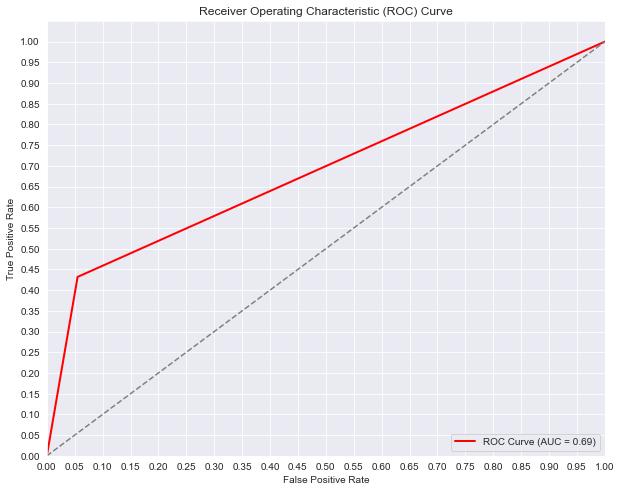

In [93]:
rf = RandomForestClassifier(criterion='gini', 
                            max_depth= None, 
                            min_samples_leaf= 1,
                            min_samples_split=2, 
                            n_estimators=100)

rf.fit(X_resampled,y_resampled)

preds = rf.predict(X_test_scaled)
print(classification_report(y_test,preds))

print("="*64)
fpr , tpr , thresholds = roc_curve(y_test,preds)
roc_auc = roc_auc_score(y_test,preds)

# plotting the Roc Curve
plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve_rf.png')
plt.show()

### IV. Ensemble Methods

In [65]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

#### AdaBoost

In [66]:
ada = AdaBoostClassifier(random_state=SEED)
ada.fit(X_train,y_train)
preds = ada.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.69      0.42      0.52      1417

    accuracy                           0.84      6677
   macro avg       0.77      0.68      0.71      6677
weighted avg       0.82      0.84      0.82      6677



In [67]:
ada = AdaBoostClassifier(random_state=SEED)
ada.fit(X_train_scaled,y_train)
preds = ada.predict(X_test_scaled)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.69      0.42      0.52      1417

    accuracy                           0.84      6677
   macro avg       0.77      0.68      0.71      6677
weighted avg       0.82      0.84      0.82      6677



In [68]:
ada = AdaBoostClassifier(random_state=SEED)
ada.fit(X_resampled,y_resampled)
preds = ada.predict(X_test_scaled)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5260
           1       0.61      0.54      0.57      1417

    accuracy                           0.83      6677
   macro avg       0.75      0.72      0.73      6677
weighted avg       0.82      0.83      0.83      6677



#### Gradient Boost

In [69]:
grd = GradientBoostingClassifier(random_state=SEED)
grd.fit(X_train,y_train)
preds = grd.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.70      0.44      0.54      1417

    accuracy                           0.84      6677
   macro avg       0.78      0.69      0.72      6677
weighted avg       0.83      0.84      0.83      6677



In [70]:
grd = GradientBoostingClassifier(random_state=SEED)
grd.fit(X_train_scaled,y_train)
preds = grd.predict(X_test_scaled)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.70      0.44      0.54      1417

    accuracy                           0.84      6677
   macro avg       0.78      0.69      0.72      6677
weighted avg       0.83      0.84      0.83      6677



In [71]:
grd = GradientBoostingClassifier(random_state=SEED)
grd.fit(X_resampled,y_resampled)
preds = grd.predict(X_test_scaled)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5260
           1       0.65      0.50      0.57      1417

    accuracy                           0.84      6677
   macro avg       0.76      0.72      0.73      6677
weighted avg       0.83      0.84      0.83      6677



## XGBoost

In [72]:
from xgboost import XGBClassifier


In [73]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
model = clf.fit(X_resampled,y_resampled)

# Predict on training and test sets
training_preds = model.predict(X_resampled)
test_preds = model.predict(X_test_scaled)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_resampled,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 93.46%
Validation accuracy: 83.48%


In [74]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5260
           1       0.66      0.47      0.55      1417

    accuracy                           0.83      6677
   macro avg       0.76      0.70      0.72      6677
weighted avg       0.82      0.83      0.82      6677



In [75]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [76]:
xgb = XGBClassifier()

grid_xgb = GridSearchCV(xgb,param_grid,scoring='accuracy',cv=5,n_jobs=1)
grid_xgb.fit(X_resampled, y_resampled)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_resampled)
test_preds = grid_xgb.predict(X_test_scaled)
training_accuracy = accuracy_score(y_resampled,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print("="*64)
print(classification_report(y_test,test_preds))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7

Training Accuracy: 91.11%
Validation accuracy: 83.78%
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5260
           1       0.66      0.48      0.55      1417

    accuracy                           0.84      6677
   macro avg       0.77      0.71      0.73      6677
weighted avg       0.83      0.84      0.83      6677



 # Best Performance of Each Classification Model

|   models  |       |      Best Performance     |    |    |
|:-----------------:|:------:|:---------:|:--:|:--:|
|     |   **Precision**  |     **Recall**    |   **f1-score** |    **Accuracy**|
|    Logistic Regression   |  0.49   |   0.72   |   0.58  | 0.78 |
|     Desicion Tree   |   0.56     | 0.56    |  0.56 | 0.81|
| Random Forest  |    0.69    | 0.42    | 0.52   | 0.83 |
| AdaBoost  | 0.59   |   0.53    |  0.56  | 0.82 |
| Gradient Boost |  0.65   |  0.50   |   0.57 | 0.84 |
| XGBoost |    0.66 |  0.45  |    0.54   |   0.83   |

In [77]:
! ls

README.md
Untitled.ipynb
Untitled1.ipynb
data


# Creating a full Pipeline of the best Model 

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import make_pipeline

numeric_columns = df.columns[df.dtypes == 'float64'].values
categorical_columns = df.columns[df.dtypes != 'float64'].values


numeric_preprocessor = Pipeline([
        ('scaler', MinMaxScaler()),
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

categorical_preprocessor = Pipeline([
        ('simple_imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
        transformers=[
            ("numeric", numeric_preprocessor, numeric_columns),
            ("categorical", categorical_preprocessor, categorical_columns)
        ],
        remainder='passthrough'  
    )


smote_pipeline = make_pipeline(SMOTE(sampling_strategy='auto', random_state=SEED), 
                               LogisticRegression(penalty='l1', solver='liblinear', C=1.0))

overall_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("smote_pipeline", smote_pipeline)
    ])

overall_pipeline.fit(df, y)

preds = overall_pipeline.predict(df)

preds

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [87]:
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     21033
           1       0.49      0.73      0.59      5674

    accuracy                           0.78     26707
   macro avg       0.70      0.76      0.72     26707
weighted avg       0.83      0.78      0.79     26707



> **The classification report stays the same as in our final logistic model above.**

# Testing Our Final Model on Our Test Data

In [88]:
testing = pd.read_csv('data/test_set_features.csv',index_col='respondent_id')

In [89]:
true_predictions = overall_pipeline.predict(testing)

In [90]:
pd.Series(true_predictions).value_counts(normalize=True)

0    0.687434
1    0.312566
dtype: float64

## Conclusions
The Final Model we used was Logistic Regression Model because it outperformed the other Model in that it provided us with better metrics than the all other classification models we used.`(Refer to the table above for the best metrics)`

The predictions on our test data indicates that 68 % of the observations recorded did not take the h1n1 vaccine .The Modelling steps above took priority in having good recall scores to maximaze the capturing of true positives.

# Recomendations

- Since the dataset had an a Majority of 65+ years observations in the `age group` column, it is safe to say that we should target the specified age group for marketing

- The dataset also had abundancy in female observations in the `sex` column, implying that on Majority females are likely to go for vaccines more than males. So the comapany should focus more on them in their outreach.


In [1]:
import surprise
from surprise.prediction_algorithms import *